# Traffic Sign Classification

# Deep Convolution Neural Network (CNN) to Classify Traffic Sign Images

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [40]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [41]:
X_train, y_train =train['features'],train['labels']
X_validation, y_validation =valid['features'],valid['labels']
X_test, y_test =test['features'],test['labels']


In [42]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

# IMAGES VISUALIZATION

9

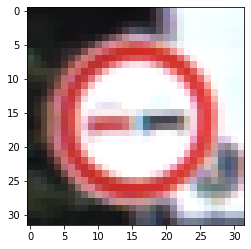

In [43]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

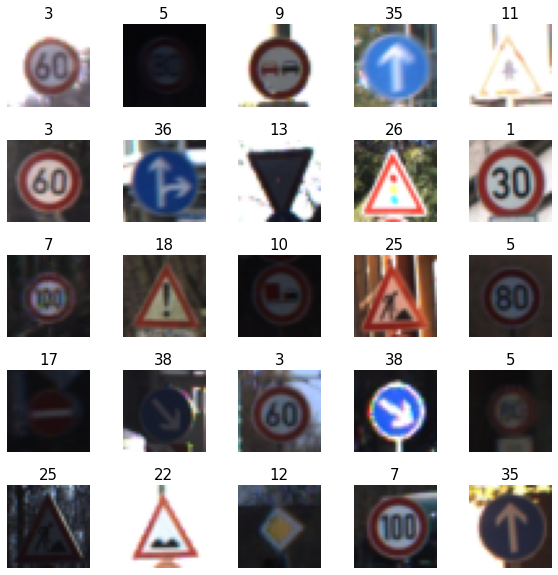

In [44]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset


for i in np.arange(0,W_grid*L_grid):

    index =np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

        

# CONVERTING IMAGES TO GRAYSCALE AND NORMALIZE

In [45]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [46]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)


In [47]:
X_train_gray.shape


(34799, 32, 32, 1)

In [48]:
X_train_gray_norm =(X_train_gray - 128)/128
X_test_gray_norm =(X_test_gray - 128)/128
X_validation_gray_norm =(X_validation_gray - 128)/128


In [14]:
X_train_gray_norm

array([[[[-0.77083333],
         [-0.75260417],
         [-0.74479167],
         ...,
         [-0.79947917],
         [-0.80208333],
         [-0.8046875 ]],

        [[-0.75520833],
         [-0.7421875 ],
         [-0.734375  ],
         ...,
         [-0.78125   ],
         [-0.78645833],
         [-0.7890625 ]],

        [[-0.74479167],
         [-0.734375  ],
         [-0.7265625 ],
         ...,
         [-0.76822917],
         [-0.77864583],
         [-0.7890625 ]],

        ...,

        [[-0.67447917],
         [-0.64583333],
         [-0.62239583],
         ...,
         [-0.8046875 ],
         [-0.79947917],
         [-0.7890625 ]],

        [[-0.66145833],
         [-0.62760417],
         [-0.6015625 ],
         ...,
         [-0.8125    ],
         [-0.81770833],
         [-0.796875  ]],

        [[-0.64583333],
         [-0.61458333],
         [-0.5859375 ],
         ...,
         [-0.81770833],
         [-0.81510417],
         [-0.8046875 ]]],


       [[[-0.29427083],


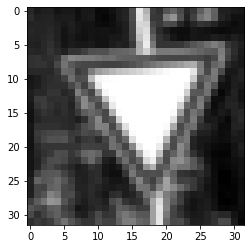

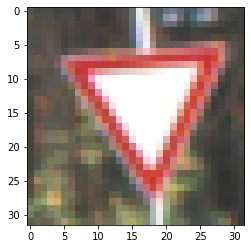

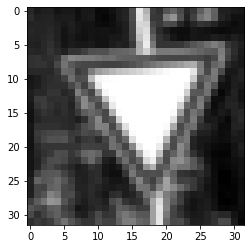

In [49]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# BUILDING DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [50]:
from tensorflow.keras import datasets, layers, models
CNN =models.Sequential()

CNN.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))
CNN.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

# COMPILEING AND TRAINING DEEP CNN MODEL

In [52]:
CNN.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
history= CNN.fit(X_train_gray_norm,
                y_train,
                batch_size=500,
                epochs = 50,
                verbose = 1,
        validation_data=(X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 23s 661us/sample - loss: 0.5367 - accuracy: 0.8469 - val_loss: 0.6116 - val_accuracy: 0.8218
Epoch 2/50
34799/34799 [==============================] - 23s 660us/sample - loss: 0.4622 - accuracy: 0.8687 - val_loss: 0.5852 - val_accuracy: 0.8324
Epoch 3/50
34799/34799 [==============================] - 23s 661us/sample - loss: 0.4059 - accuracy: 0.8865 - val_loss: 0.5603 - val_accuracy: 0.8435
Epoch 4/50
34799/34799 [==============================] - 23s 665us/sample - loss: 0.3663 - accuracy: 0.8963 - val_loss: 0.5309 - val_accuracy: 0.8413
Epoch 5/50
34799/34799 [==============================] - 24s 691us/sample - loss: 0.3286 - accuracy: 0.9086 - val_loss: 0.5115 - val_accuracy: 0.8590
Epoch 6/50
34799/34799 [==============================] - 24s 680us/sample - loss: 0.2957 - accuracy: 0.9180 - val_loss: 0.5280 - val_accuracy: 0.8590
Epoch 7/50
34799/34799 [=====================

# TRAINED CNN MODEL PERFORMANCE 

In [55]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 428us/sample - loss: 0.6671 - accuracy: 0.9104
Test Accuracy: 0.9103721380233765


In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

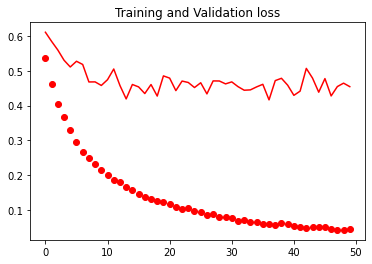

In [58]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss , 'r', label ='Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

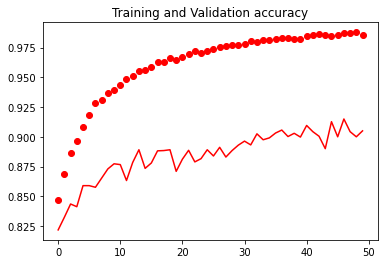

In [59]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')

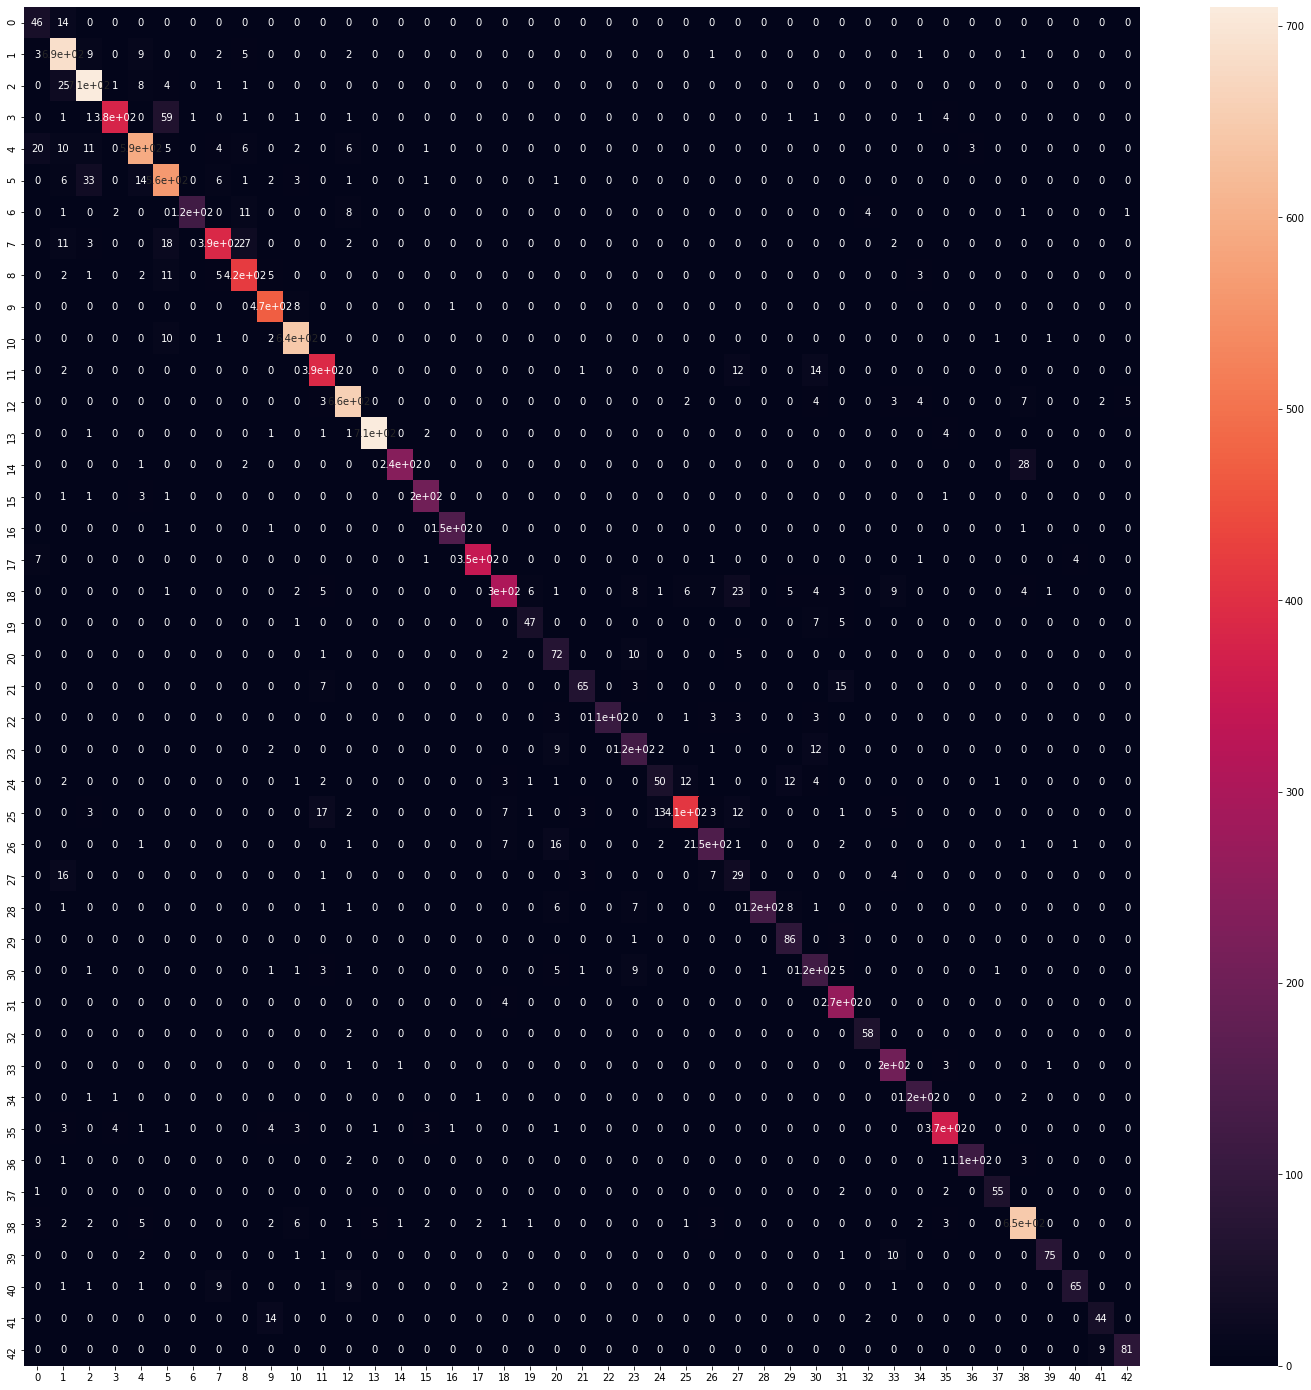

In [60]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

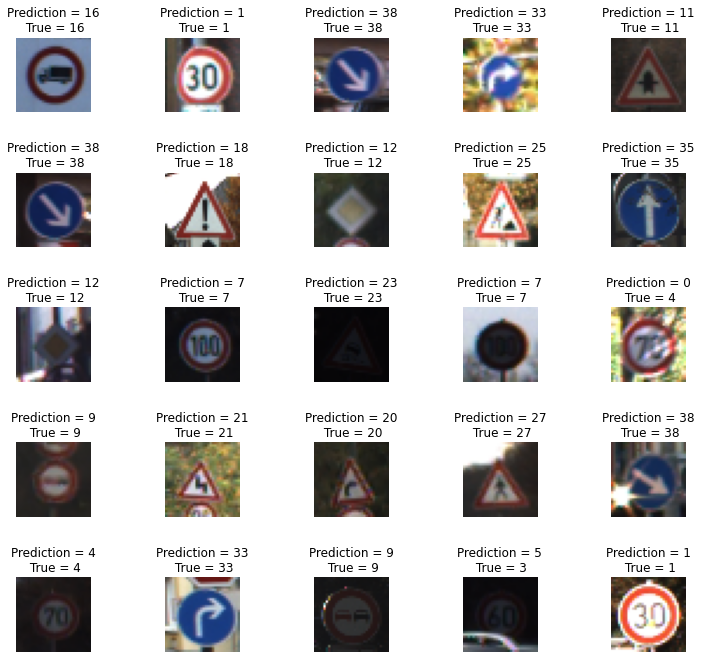

In [61]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

